In [20]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
print('Shape of data is : ', data.shape)

Shape of data is :  (200, 4)


In [24]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [25]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
X = data[['Radio']]
Y = data['Sales']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
coefficients = model.coef_

rss = ((y_test - y_pred)**2).sum()
r2 = r2_score(y_test, y_pred)

print(f'Coefficients is : {coefficients}')
print(f'Residual sum of squares : {rss}')
print(f'R2 score : {r2}')

Coefficients is : [0.12000114]
Residual sum of squares : 1103.823277943327
R2 score : 0.10697088619553419


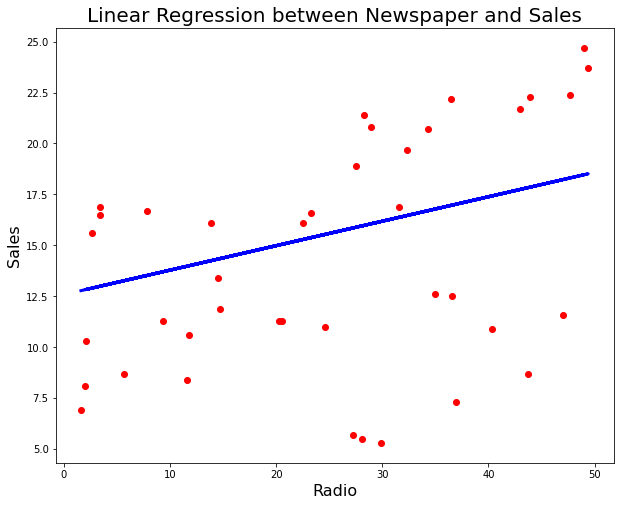

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression between Newspaper and Sales', fontsize=20)
plt.xlabel('Radio', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [33]:
X = data['Radio']
Y = data['Sales']

m = 0
c = 0

L = 0.0001
epochs = 1000

n = float(len(X))

print(f'Shape of X is : {Y.shape}')
print(f'Shape of Y is : {Y.shape}')

for i in range(epochs):
    Y_pred = m*X+c

    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)

    m = m - L * D_m
    c = c - L * D_c

print(m,c)

Shape of X is : (200,)
Shape of Y is : (200,)
0.47744361863337637 0.6995388359106587


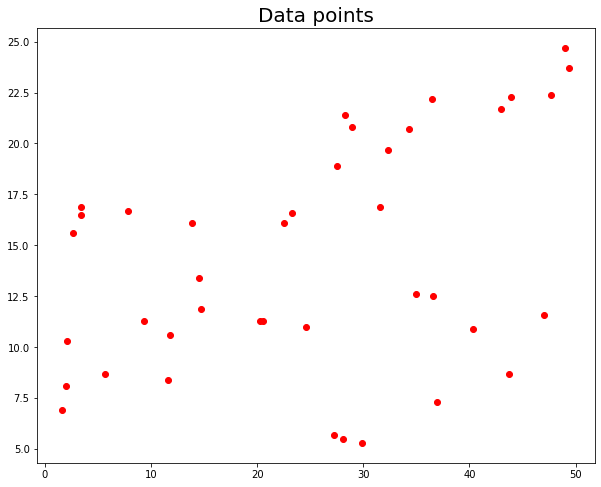

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(x_test, y_test, color='red')
plt.title('Data points', fontsize=20)
plt.show()

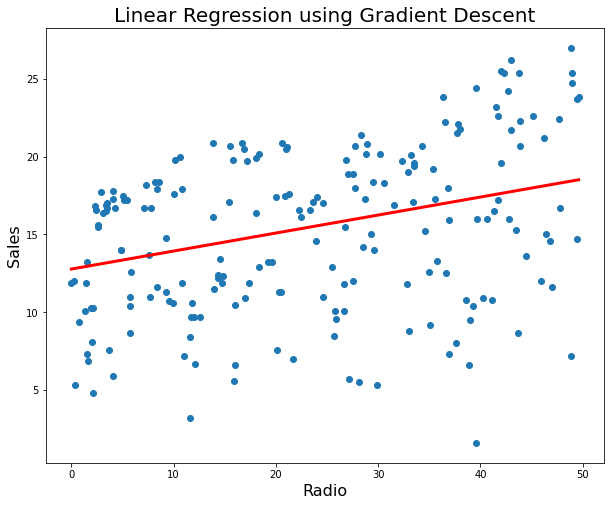

In [35]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red', linewidth=3)
plt.title('Linear Regression using Gradient Descent', fontsize=20)
plt.xlabel('Radio', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()